# 1. Python

### 1. List, tuple, dict, set, range, xrange, list comprehension

List - изменяемый тип, tuple - неизменяемый. Соответственно второй можно использовать в качестве ключа для dict и добавлять в set, так как dict и set используют хэш-функцию. Dict в python - это хеш-таблица. Range в python 2.x возвращает list, а x range - генератор. List comprehension - синтаксический сахар для быстрого создания массивов. Функция map() - это функция, принимающая аргументами другую функцию одного аргумента и массив. Возвращаемым значеним map() является итератор по массиву, образованному из первоначального применением функции ко всем его элементам. Функция reduce() имеет такие же аргументы, как и map(). Она последовательно применяет функцию к элементам массива, и на выходе получается одно значение.

List:

In [2]:
a = [1, "B", 15.5]
a.append(80)
print(a)

[1, 'B', 15.5, 80]


Tuple:

In [4]:
b = (1, 20.5, "A", [18, 30])
b[3].append(40) # Допустимо, т.к. хеш от list вычисляется по его ссылке, которая фактически лежит в a[3] и не меняется 
print(b)
b.append(2) # Нельзя!

(1, 20.5, 'A', [18, 30, 40])


AttributeError: 'tuple' object has no attribute 'append'

Dict:

In [5]:
d = {"key1": "value1", "key2": 2, 3:3}

Set:

In [6]:
c = {"a", 1, 13.5}

map():

In [7]:
a = [1, 2, 3]
print(list(map(lambda x: x++2, a)))

[3, 4, 5]


reduce():

In [8]:
from functools import reduce
b = [1]*5
print(reduce(lambda x, y: x + y, b))

5


### 2. Рекурсивное вычисление чисел Фибоначчи

In [9]:
def fib(n):
    if n == 0 or n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)

Алгоритм экспоненциальный, при достижении n 35-36 время рассчета становится существенным: 

In [10]:
%%timeit
fib(6)

5.15 µs ± 193 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [11]:
%%timeit
fib(15)

407 µs ± 15.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [12]:
%%timeit
fib(36)

9.77 s ± 280 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Проблемы с глубиной рекурсии начинаются с n ~ 3000:

In [13]:
print(fib(3000))

RecursionError: maximum recursion depth exceeded in comparison

Допустимая глубина рекурсии в python меняется следующим образом:

In [ ]:
limit = 1000
sys.setrecursionlimit(limit)

### 3. Измерение времени работы 

Выполнено выше

### 4. Модуль и аргумент комплексного числа

In [14]:
import math

def get_abs_and_arg(real, imaginary):
    abs_val = (real**2 + imaginary**2)**(1/2)
    float_equality_threshold = 10e-9
    if(real <= float_equality_threshold):
        if (real > 0):
            arg_val = math.pi * (3/2)
        else:
            arg_val = math.pi * (1/2)
    else:
        arg_val = math.atan(imaginary/real)
    return abs_val, arg_val

Функция возвращает tuple:

In [15]:
print(get_abs_and_arg(10, 0))
print(get_abs_and_arg(0, 10))
print(get_abs_and_arg(5.0, 5.0))

(10.0, 0.0)
(10.0, 1.5707963267948966)
(7.0710678118654755, 0.7853981633974483)


### 5. Doctest 

In [16]:
import doctest
def get_abs_and_arg(real, imaginary):
    """Returns the absolut value and the argument of complex number
    with given real and imaginary parts.

    If the result is small enough to fit in an int, return an int.
    Else return a long.

    >>> get_abs_and_arg(10, 0)
    (10.0, 0.0)
    >>> get_abs_and_arg(0, 10)
    (10.0, 1.5707963267948966)
    >>> get_abs_and_arg(5.0, 5.0)
    (7.0710678118654755, 0.7853981633974483)
    >>> get_abs_and_arg("a", 5.0)
    Traceback (most recent call last):
        ...
    TypeError: arguments must be of type int or float
    """
    
    import math
    
    if (type(real) != int and type(real) != float or type(imaginary) != int and type(imaginary) != float):
        raise TypeError("arguments must be of type int or float")
    
    abs_val = (real**2 + imaginary**2)**(1/2)
    float_equality_threshold = 10e-9
    if(real <= float_equality_threshold):
        if (real > 0):
            arg_val = math.pi * (3/2)
        else:
            arg_val = math.pi * (1/2)
    else:
        arg_val = math.atan(imaginary/real)
    return abs_val, arg_val

In [17]:
doctest.testmod()

TestResults(failed=0, attempted=4)

### 6. Классы

In [18]:
class Complex_Number(object):
    def __init__(self, real, imaginary):
        self.real = real
        self.imaginary = imaginary
        
    def __add__(self, another_complex):
        return Complex_Number(self.real + another_complex.real, self.imaginary + another_complex.imaginary)
    
    def __mul__(self, another_complex):
        x = self.real*another_complex.real - self.imaginary*another_complex.imaginary
        y = self.imaginary*another_complex.real + self.real*another_complex.imaginary
        return Complex_Number(x, y)
    
    def __str__(self):
        return "Complex number: {0} + i*{1}".format(self.real, self.imaginary)       

In [19]:
a = Complex_Number(10,1)
b = Complex_Number(1, 10)
print(a * b)

Complex number: 0 + i*101


### 7. Декораторы 

Декоратор-таймер и кэширующий декоратор. Общий принцип работы декораторов - навешивание какой-то дополнительной логики к выполнению декорируемой функции.
Таймер печатает время выполнения функции, засекая показания системного времени до и после выполнения основной функции.
Кэширующий декоратор содержит сет результатов работы функции со всеми ранее использованными аргументами, и возвращает результат из этого сета если он уже был ранее посчитан вместо вызова функции.

In [20]:
def timer(f):
    import time
    def tmp(*args, **kwargs):
        t = time.time()
        res = f(*args, **kwargs)
        print("Время выполнения функции %s: %f" % (str(f), (time.time()-t)))
        return res

    return tmp

def memoized(f):
    memory = {}
    
    def wrapper(*args, **kwargs):
        key = (tuple(args), hash(tuple(sorted(kwargs.items()))))
        if not key in memory:
            memory[key] = f(*args, **kwargs)
        return memory[key]
    
    return wrapper

In [21]:
@memoized
@timer
def fib(n):
    if n == 0 or n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)

Ниже видно, что при подсчете факториала 30 в первый раз вызываются функции для подсчета всех факториалов от 0 до 30.
Декоратор подсчета времени вызывается каждый раз при вызове функции с новым для декоратора memorized аргументом.

In [22]:
fib(30)

Время выполнения функции <function fib at 0x000000000561B7B8>: 0.000000
Время выполнения функции <function fib at 0x000000000561B7B8>: 0.000000
Время выполнения функции <function fib at 0x000000000561B7B8>: 0.000000
Время выполнения функции <function fib at 0x000000000561B7B8>: 0.000000
Время выполнения функции <function fib at 0x000000000561B7B8>: 0.000000
Время выполнения функции <function fib at 0x000000000561B7B8>: 0.000000
Время выполнения функции <function fib at 0x000000000561B7B8>: 0.004000
Время выполнения функции <function fib at 0x000000000561B7B8>: 0.005001
Время выполнения функции <function fib at 0x000000000561B7B8>: 0.005001
Время выполнения функции <function fib at 0x000000000561B7B8>: 0.005001
Время выполнения функции <function fib at 0x000000000561B7B8>: 0.005001
Время выполнения функции <function fib at 0x000000000561B7B8>: 0.005001
Время выполнения функции <function fib at 0x000000000561B7B8>: 0.005001
Время выполнения функции <function fib at 0x000000000561B7B8>: 0

1346269

Считая факториал 30 во второй раз, получим уже посчитанное значение, причем, так как обернутая в memorized функция не вызывается, декоратор подсчета времени не отрабатывает.

In [23]:
fib(30)

1346269

Попробуем изменить порядок декорирования функции.

In [24]:
@timer
@memoized
def fib(n):
    if n == 0 or n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)

Количество напечатанных строчек со временем работы увеличилось, т. к. теперь обернутый в memorized fib(n) может вызваться максимум 2 раза, и время будет считаться для двух вызовов

In [25]:
fib(30)

Время выполнения функции <function memoized.<locals>.wrapper at 0x000000000561BEA0>: 0.000000
Время выполнения функции <function memoized.<locals>.wrapper at 0x000000000561BEA0>: 0.000000
Время выполнения функции <function memoized.<locals>.wrapper at 0x000000000561BEA0>: 0.000000
Время выполнения функции <function memoized.<locals>.wrapper at 0x000000000561BEA0>: 0.000000
Время выполнения функции <function memoized.<locals>.wrapper at 0x000000000561BEA0>: 0.000000
Время выполнения функции <function memoized.<locals>.wrapper at 0x000000000561BEA0>: 0.000000
Время выполнения функции <function memoized.<locals>.wrapper at 0x000000000561BEA0>: 0.000000
Время выполнения функции <function memoized.<locals>.wrapper at 0x000000000561BEA0>: 0.000000
Время выполнения функции <function memoized.<locals>.wrapper at 0x000000000561BEA0>: 0.000000
Время выполнения функции <function memoized.<locals>.wrapper at 0x000000000561BEA0>: 0.000000
Время выполнения функции <function memoized.<locals>.wrapper

1346269

In [26]:
fib(30)

Время выполнения функции <function memoized.<locals>.wrapper at 0x000000000561BEA0>: 0.000000


1346269

### 8. self.x и @property

In [27]:
class MyClass(object):
    def __init__(self):
        self.x = 0
        self.y = 1
        
    @property    
    def prop(self):
        return 2

In [28]:
a = MyClass()

In [29]:
print("a.x = {0}, a.y = {1}, a.prop = {2}".format(a.x, a.y, a.prop))

a.x = 0, a.y = 1, a.prop = 2


In [30]:
a.x = 5
a.y = 10

In [31]:
a.prop = 20

AttributeError: can't set attribute

Отличие в обьявлении поля класса x через self.x от задания атрибута класса через @property заключается в том, что в первом случае создается поле с доступом на чтение и изменение, а во втором случае только на чтение. Изменение артрибута, заданного через @property возможно только косвенно, через изменение параметров класса, от которых зависит @property, например: 

In [32]:
class Person(object):
    def __init__(self, first_name, last_name):
        self.first_name = first_name
        self.last_name = last_name
    
    @property
    def full_name(self):
        return "%s %s" % (self.first_name, self.last_name)

In [33]:
person = Person("Vladimir", "Putin")
print(person.full_name)

Vladimir Putin


In [34]:
person.first_name = "Dmitry"
person.last_name = "Medvedev"
print(person.full_name)

Dmitry Medvedev


### 9. Добавлены сеттеры и геттеры 

In [35]:
class Complex_Number(object):
    def __init__(self, real, imaginary):
        self.real = real
        self.imaginary = imaginary
        
    def __add__(self, another_complex):
        return Complex_Number(self.real + another_complex.real, self.imaginary + another_complex.imaginary)
    
    def __mul__(self, another_complex):
        x = self.real*another_complex.real - self.imaginary*another_complex.imaginary
        y = self.imaginary*another_complex.real + self.real*another_complex.imaginary
        return Complex_Number(x, y)
    
    def __str__(self):
        return "Complex number: {0} + i*{1}".format(self.real, self.imaginary)
    
    @property
    def real(self):
        return self.__real
    
    @property
    def imaginary(self):
        return self.__imaginary
    
    @real.setter
    def real(self, value):
        if isinstance(value, int):
            self.__real = float(value)
        elif isinstance(value, float):
            self.__real = int(value)
        else:
            raise TypeError("wrong type for complex number field")  
    
    @real.setter
    def imaginary(self, value):
        if isinstance(value, int):
            self.__imaginary = float(value)
        elif isinstance(value, float):
            self.__imaginary = int(value)
        else:
            raise TypeError("wrong type for complex number field")
    

In [36]:
complex_number_1 = Complex_Number(10, 15.0)
print(complex_number_1)

Complex number: 10.0 + i*10.0


In [37]:
complex_number_1.real = "a"
print(complex_number_1)

TypeError: wrong type for complex number field

# 2. Requests/urlib + BeautifulSoup

In [38]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [39]:
URL = "https://www.bbc.com/news/world-europe-46425777"
page = urlopen(URL)
soup = BeautifulSoup(page, "html.parser")

In [40]:
article_title = soup.find("p", attrs={"class": "story-body__introduction"})
article_body = soup.findAll("p", attrs={"class": None, "style": None})

article = article_title.text.strip() + "\n\n" 

for paragraph in article_body:
    article += (paragraph.text.strip() + "\n\n")
    
print(article)

Does crisis beckon in the Black Sea? Could Russia and Nato even come to blows?

That - at least for now - is probably unlikely. But the recent seizure of two Ukrainian gunboats and a tug in the approaches to the Kerch Strait, by vessels of the Russian Border Guard, has inevitably brought security in the Black Sea to the forefront of Nato's agenda at their meeting in Brussels on Tuesday.

The Black Sea has long had strategic significance.

It was, after all, the theatre for a major conflict between the Western powers France and Great Britain and Imperial Russia in the mid-19th Century. During the Cold War, it was the Soviet Union's shortest route to Iran and the Middle East. Turkey - a Nato ally - stood astride the Black Sea's southern exit to the Mediterranean, facing Russia across the Black Sea to its the north.

For the Russians this was always seen as their "back yard". And the end of the Cold War and the break-up of the Soviet Union greatly complicated relationships.

Russia has en

# 3. Numpy 

### 1. Разные способы индексации 

In [41]:
import numpy as np

In [42]:
zeros = np.zeros((3, 4, 2), dtype="int")
print(zeros)

[[[0 0]
  [0 0]
  [0 0]
  [0 0]]

 [[0 0]
  [0 0]
  [0 0]
  [0 0]]

 [[0 0]
  [0 0]
  [0 0]
  [0 0]]]


In [43]:
zeros[0,:,:] = np.array([[1, 2],[3, 4],[5, 6],[7, 8]])
zeros[1,:,:] = np.array([[10, 20],[30, 40],[50, 60],[70, 80]])
zeros[:,3,1] = np.array([5, 5, 5])

In [44]:
zeros

array([[[ 1,  2],
        [ 3,  4],
        [ 5,  6],
        [ 7,  5]],

       [[10, 20],
        [30, 40],
        [50, 60],
        [70,  5]],

       [[ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  5]]])

In [45]:
zeros[0:2,:,:]

array([[[ 1,  2],
        [ 3,  4],
        [ 5,  6],
        [ 7,  5]],

       [[10, 20],
        [30, 40],
        [50, 60],
        [70,  5]]])

In [46]:
zeros[:1,:1,0]

array([[1]])

In [47]:
zeros[(0, 1),(0, 1),(0, 1)] 

array([ 1, 40])

In [48]:
zeros[(0, 1),(0, 1)] 

array([[ 1,  2],
       [30, 40]])

In [49]:
zeros[2][3][1]

5

In [50]:
import numpy as np
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
mask = np.array([[0, 0, 1],[0, 0, 1], [0, 0, 1]], dtype="bool")
matrix[mask]

array([3, 6, 9])

In [58]:
matrix[:,::-1]

array([[3, 2, 1],
       [6, 5, 4],
       [9, 8, 7]])

### 2. Сравнение производительности np.array и list

In [59]:
a = [1.0]*10000
b = [2.0]*10000
a1 = np.array(a)
b1 = np.array(b)

In [60]:
%%timeit
c = [x * y for x, y in zip(a,b)]

874 µs ± 45.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [61]:
%%timeit
c = a1 * b1

9.35 µs ± 600 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [62]:
%%timeit
c = [x * y for x, y in zip(a1, b1)]

3 ms ± 471 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### 3. numpy.linspace()

In [63]:
def linspace(start, stop, num=50):
    step = (stop - start)/(num-1)
    return [start + step*i for i in range(num)]

In [64]:
print(linspace(0, 1, 11))
print(np.linspace(0, 1, 11))

[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [65]:
%%timeit
a = linspace(0, 1, 1000000)

241 ms ± 40 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [66]:
%%timeit
b = np.linspace(0, 1, 1000000)

10.2 ms ± 869 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)



Linspace в Numpy работает значительно быстрее

# 4. Matplotlib 

### 1. %matplotlib inline

%matplotlib inline это magic-функция IPython, которая настраивает корректную работу matplotlib с IPython. %matplotlib задает вывод команд отрисовки в отдельное окно, в то время как %matplotlib inline позволяет направить этот вывод в ячейку и отрисовывать и хранить график там.

### 2. График элементарной функции 

In [67]:
import numpy as np
import math

%matplotlib inline
import matplotlib.pyplot as plt

In [68]:
X = np.linspace(0, 6, 500)
Y = [math.sin(x) for x in X]

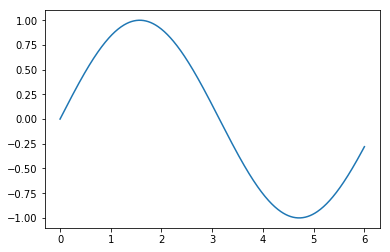

In [69]:
plt.plot(X, Y);

### 3. Несколько графиков 

In [71]:
import matplotlib.pylab as plt
%pylab inline

import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = 9, 7
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rc('font', weight='bold')
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
# чтобы был русский шрифт
from matplotlib import rc
font = {'family': 'Verdana',
        'weight': 'normal'}
rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


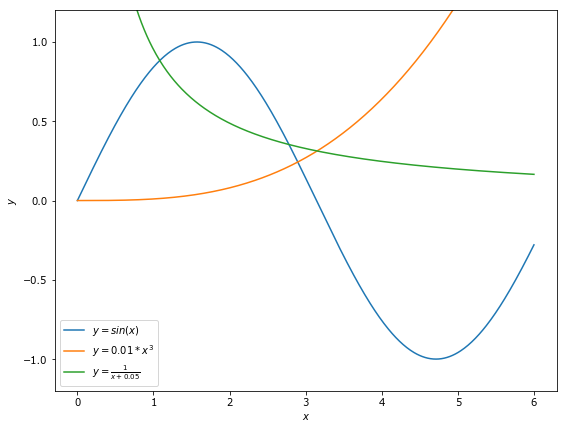

In [72]:
X = np.linspace(0, 6, 500)
Y = [math.sin(x) for x in X]
Y1 = [0.01*x**3 for x in X]
Y2 = [1/(x + 0.05) for x in X]
plt.ylim(-1.2, 1.2)
plt.plot(X, Y, label="$y = sin(x)$")
plt.plot(X, Y1, label="$y = 0.01*x^3$")
plt.plot(X, Y2, label="$y = \\frac{1}{x + 0.05}$")
plt.legend(loc="lower left")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.savefig('charts.png')
plt.show()

### 4. 4 системы координат 

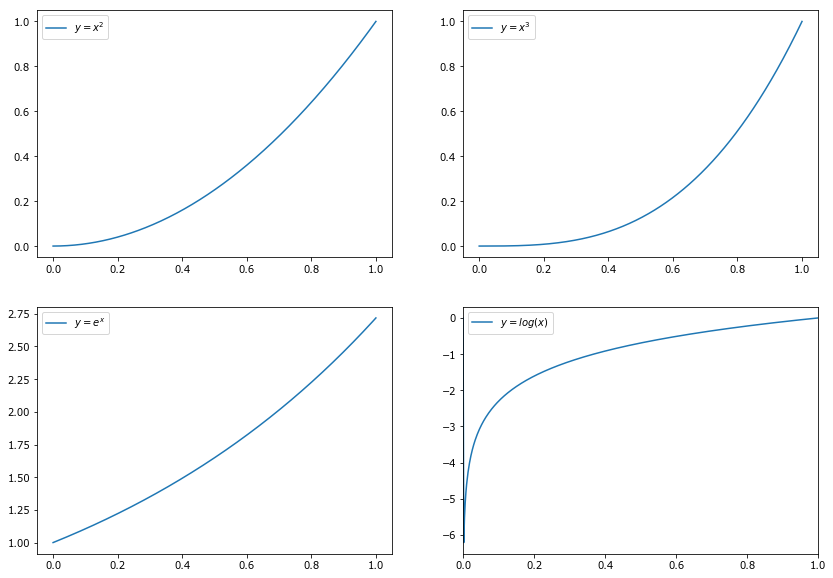

In [73]:
plt.rcParams['figure.figsize'] = 14, 10

X = np.linspace(0, 1, 500)

Y1 = [x**2 for x in X]
plt.subplot(221)
plt.plot(X, Y1, label="$y = x^2$")
plt.legend()

Y2 = [x**3 for x in X]
plt.subplot(222)
plt.plot(X, Y2, label="$y = x^3$")
plt.legend()

Y3 = [math.exp(x) for x in X]
plt.subplot(223)
plt.plot(X, Y3, label="$y = e^x$")
plt.legend()

Y4 = [math.log(x) if x > 0 else 0 for x in X]
plt.subplot(224)
plt.plot(X, Y4, label="$y = log(x)$")
plt.legend()

plt.xlim(0, 1)
plt.plot()
plt.legend()

### 5. Heatmap 

In [74]:
def f(x, y):
    return 3*x*y + x - 2*y

In [75]:
num = 20
delta = 5/num
X = np.linspace(0, 5, num)
Y = np.linspace(0, 5, num)
Z = np.empty([num, num], dtype="float")
for i in range(num):
    for j in range(num):
        x = i * delta
        y = j * delta
        Z[i, j] = f(x, y)

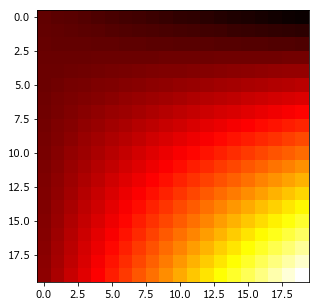

In [76]:
plt.rcParams['figure.figsize'] = 5, 5
a = np.random.random((16, 16))
plt.imshow(Z, cmap='hot', interpolation='nearest')
plt.show()

### 6. Трехмерный график 

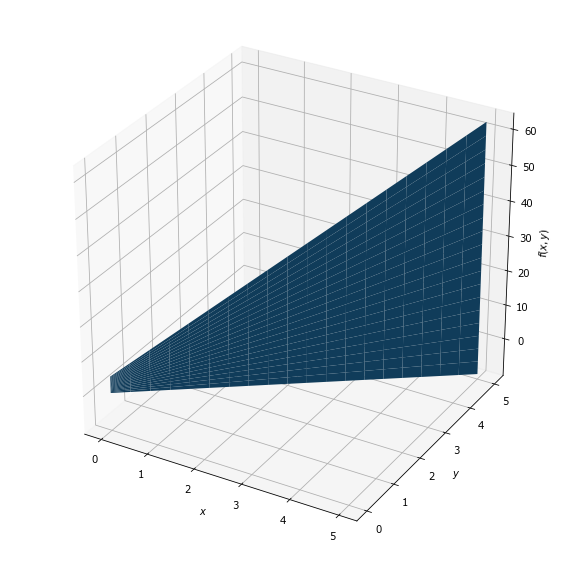

In [77]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (10, 10))
ax = fig.gca(projection = '3d')

surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$f(x, y)$')
plt.show()

# 5. Все вместе + SciPy 

In [245]:
import scipy.optimize

In [246]:
def f(x):
    return x**3 + 2*(x**2) - 3*x + 2

def f_predicted(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

In [247]:
X = [np.random.normal(0, 1) for i in range(500)]
X.sort()

In [248]:
Y = list(map(f, X))
dots= list(zip(X, Y))
Y_noisy = [y + np.random.normal(0, 0.5) for y in Y]

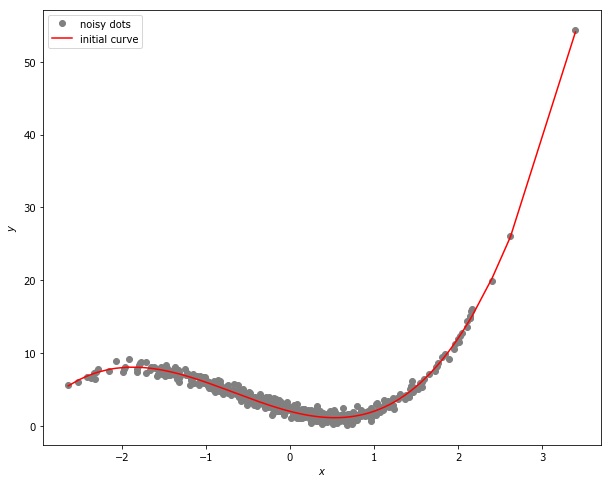

In [265]:
plt.rcParams['figure.figsize'] = 10, 8
plt.xlabel("$x$")
plt.ylabel("$y$")

plt.plot(X, Y_noisy, "o", color='grey', label='noisy dots')
plt.plot(X, Y, color='red', label='initial curve')
plt.legend()

In [250]:
p_opt, p_cov = scipy.optimize.curve_fit(f_predicted, X, Y_noisy)

In [251]:
Y_predicted = [f_predicted(x, *p_opt) for x in X]

In [266]:
def f_pred(x):
    return f_predicted(x, *p_opt)
def f_pred_neg(x):
    return -f_predicted(x, *p_opt)

In [267]:
min_val = scipy.optimize.fmin_bfgs(f_pred, 0)[0]
max_val = scipy.optimize.fmin_bfgs(f_pred_neg, 0)[0]

Optimization terminated successfully.
         Current function value: 1.166705
         Iterations: 5
         Function evaluations: 21
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -8.042403
         Iterations: 5
         Function evaluations: 27
         Gradient evaluations: 9


In [268]:
max_val

-1.8422996522324366

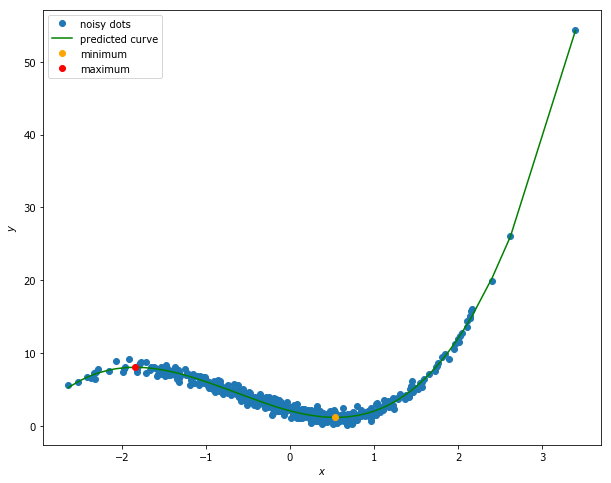

In [272]:
plt.rcParams['figure.figsize'] = 10, 8
plt.xlabel("$x$")
plt.ylabel("$y$")

plt.plot(X, Y_noisy, "o", label='noisy dots')
plt.plot(X, Y_predicted, color='green', label='predicted curve')
plt.plot(min_val, f_pred(min_val), 'o', color='orange', label='minimum')
plt.plot(max_val, f_pred(max_val), 'o', color='red', label='maximum')
plt.legend()